# 04.02 선형회귀분석의 기초

회귀분석은 독립변수 $x$에 대응하는 종속변수 $y$와 가장 비슷한 값 $\hat{y}$를 출력하는 함수 $f(x)$를 찾는 과정이다. 

$$ 
\hat{y} = f \left( x \right) \approx y 
$$

만약 $f(x)$가 다음과 같은 선형함수면 이 함수를 **선형회귀모형(linear regression model)**이라고 한다. 선형회귀모형을 사용하는 회귀분석은 선형회귀분석이라고 한다.

$$ 
\hat{y} = w_0 + w_1 x_1 + w_2 x_2 + \cdots + w_D x_D = w_0 + w^Tx 
$$

위 식에서 독립변수 $x=(x_1, x_2, \ldots, x_D)$는 $D$차원 벡터다. 가중치 벡터 $w=(w_0, \cdots, w_D)$는 함수 $f(x)$의 계수(coefficient)이자 이 선형회귀모형의 **모수(parameter)**라고 한다. 

# 1. 상수항 결합
 
$$w_0 + w^Tx$$ 식을 $$w^Tx$$ 로 간단히 표현하기 위해 상수항을 결합해 x행렬 구성

```

statsmodel 패키지 -> add_constant 함수 제공

```

In [3]:
x0 = np.arange(10).reshape(5,-2)
x0

array([[0, 1],
       [2, 3],
       [4, 5],
       [6, 7],
       [8, 9]])

In [5]:
import statsmodels.api as sm

X = sm.add_constant(x0)
X

array([[1., 0., 1.],
       [1., 2., 3.],
       [1., 4., 5.],
       [1., 6., 7.],
       [1., 8., 9.]])

# 2. Numpy를 이용한 선형 회귀분석

    - OLS 방법을 이용한 선형회귀분석 (RSS를 최소화하는 가중치벡터 구하기)

In [6]:
# 1. make_regression -> 1차원 특징데이터 x, 이 값에 의존하는 완전 선형 y 생성

from sklearn.datasets import make_regression
bias = 100
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1)

X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

In [7]:
# 2. make_regression -> 모수 w 생성. 이것은 실제 가중치(맞춰야 할)
w

array(86.44794301)

In [8]:
# 3. OLS해(가중치)를 직접 구하기

w = np.linalg.inv(X.T @ X) @ X.T @ y
w

# 비슷하지만, 약간의 오차가 있음 => 잔차

array([[99.79150869],
       [86.96171201]])

# 3. statsmodels 패키지를 사용한 선형 회귀분석





statsmodels 패키지에서는 `OLS` 클래스를 사용하여 선형 회귀분석을 실시한다. `OLS` 클래스 사용법은 다음과 같다.

1. 독립변수와 종속변수가 모두 포함된 데이터프레임 생성. 상수항 결함은 하지 않아도 된다. 


2. `OLS` 클래스 객체 생성. 이 때 from_formula 메서드의 인수로 종속변수와 독립변수를 지정하는 formula 문자열을 넣는다. 
   data 인수로는 독립변수와 종속변수가 모두 포함된 데이터프레임을 넣는다.
    ```
    model = OLS.from_formula(formula, data=df)
    ```
    또는 독립변수만 있는 데이터프레임 `dfX`와 종속변수만 있는 데이터프레임  `dfy`를 인수로 넣어서 만들 수도 있다. 이 때는 독립변수만 있는 데이터프레임 `dfX`가 상수항을 가지고 있어야 한다.
    
    ```
    model = OLS(dfy, dfX)
    ```
    
    
3. `fit` 메서드로 모형 추정. scikit-learn 패키지와 달리 추정 결과는 별도의 `RegressionResults` 클래스 객체로 출력된다.
    ```
    result = model.fit()
    ```

4. `RegressionResults` 클래스 객체는 결과 리포트용 `summary` 메서드와 예측을 위한 `prediction` 메서드를 제공한다.
    ```
    print(result.summary())
    
    y_new = result.predict(x_new)
    ```
    이 때, 예측을 위한 데이터는 추정시와 동일하게 상수항 결합을 해 주어야 한다.

In [44]:
import statsmodels

In [75]:
# 1. 독립변수와 종속변수가 모두 포함된 데이터프레임 생성

from sklearn.datasets import make_regression
X0, y, w = make_regression(
    n_samples=200, n_features=1, bias=bias, noise=10, coef=True, random_state=1
)
X = sm.add_constant(X0)
y = y.reshape(len(y), 1)

df = pd.DataFrame({"x":X0[:,0],'y':y[:,0]})
df

,x,y
0,0.232495,127.879017
1,-0.038696,93.032914
2,0.550537,161.857508
3,0.503185,141.692050
4,2.186980,283.260119
...,...,...
195,-0.172428,87.874277
196,-1.199268,-13.626664
197,1.462108,216.106619
198,1.131629,212.743149


In [78]:
# 2. 모델 객체 만들기
# dfx(상수항 포함), dfy를 나눠서 직접 넣는 방법 선택
# 시리즈가 아닌 데이터프레임으로 넣어야 함! df['y'] => 시리즈 / df[['y']] => 데이터프레임

dfy = df[['y']]
dfx = sm.add_constant(df[['x']])
model = sm.OLS(dfy,dfx)

In [79]:
# 3. 학습시키기 (fit메서드) -> regressionresult 라는 클래스의 객체에 저장됨

result = model.fit()

In [80]:
# 4. 결과 출력

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.985
Model:                            OLS   Adj. R-squared:                  0.985
Method:                 Least Squares   F-statistic:                 1.278e+04
Date:                Thu, 14 May 2020   Prob (F-statistic):          8.17e-182
Time:                        21:33:59   Log-Likelihood:                -741.28
No. Observations:                 200   AIC:                             1487.
Df Residuals:                     198   BIC:                             1493.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         99.7915      0.705    141.592      0.0

In [81]:
# 5. result 객체에 저장된 내용 : 계수, 잔차벡터

result.params

const    99.791509
x        86.961712
dtype: float64

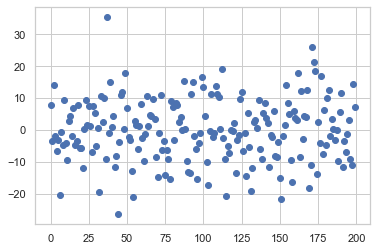

In [82]:
result.resid.plot(style='o')

In [83]:
# 직교방정식의 성질 확인
# 1. 잔차의 합 = 0

result.resid.sum()

7.034373084024992e-13

# 4. 보스턴 집값 데이터 예제


In [89]:
from sklearn.datasets import load_boston

boston = load_boston()

dfX0 = pd.DataFrame(boston.data, columns = boston.feature_names)
dfx = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns = ['MEDV'])

In [90]:
model = sm.OLS(dfy,dfx)
result = model.fit()

print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 14 May 2020   Prob (F-statistic):          6.72e-135
Time:                        21:38:22   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0